# Can you make a computer recognize written numbers?


###### (Model adapted from [Yalcin](https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d) and deployment from [Aguayo](https://towardsdatascience.com/deploying-a-simple-machine-learning-model-into-a-webapp-using-tensorflow-js-3609c297fb04))

Make sure that you "run" each of the "cells". The runnable "cells" are the boxes that have the play button image.pngon the top left. To "run" a cell, click on the play button.

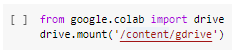

Side note:
>   When you hover over the set of brackets, the brackets will turn into a play button.image.png Click on the button to run the cell. When you click, the button will soon turn into a stop button.image.png Click on this button to stop the cell from running.

You should run all of the cells in the order that they are in.

If you are interested in learning and understanding the code or other information, please refer to the [Guide](https://) tab on the website for more information.

In [1]:
# Import and download dataset
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape array
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Create a model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape),
                                    tf.keras.layers.Conv2D(28, kernel_size=(3,3), input_shape=input_shape),
                                    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Fit model
model.fit(x=x_train,y=y_train, epochs=10)

# Evaluate model
model.evaluate(x_test, y_test)

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1982 - accuracy: 0.9408
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0819 - accuracy: 0.9738
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0575 - accuracy: 0.9820
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0443 - accuracy: 0.9857
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0351 - accuracy: 0.9879
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0301 - accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0242 - accuracy: 0.9917
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0221 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0196 - accuracy: 0.9934
Epoch 10/10
313/3

[0.05854174122214317, 0.9850999712944031]

# Export and deploy your model for your own needs
Wow, we got a training accuracy of 99+% and testing accuracy of 98+%! That is really good!

Not it is time to deploy this model for our website. You can do this for your own apps and uses as well.

In [2]:
# Save and export model for deployment
model.save("model.h5")

!pip install tensorflowjs
!tensorflowjs_converter --input_format keras '/content/model.h5' '/content/model'

     |████████████████████████████████| 71kB 3.7MB/s 
2020-10-19 17:20:27.290320: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
